In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
sns.set(style="darkgrid")

import statsmodels.api as sm

In [2]:
from paths_usa import *

# Compare different wind and wp correlations

load results

In [12]:
results_USA_m = pd.read_csv(results_path + '/stats_USAm.csv',index_col=0)
results_BPA_m = pd.read_csv(results_path + '/stats_BPAm.csv',index_col=0)
results_BPA_d = pd.read_csv(results_path + '/stats_BPAd.csv',index_col=0)
results_BPA_h = pd.read_csv(results_path + '/stats_BPAh.csv',index_col=0)
results_NE_m = pd.read_csv(results_path + '/stats_NEm.csv',index_col=0)
results_TX_m = pd.read_csv(results_path + '/stats_TXm.csv',index_col=0)
results_TX_d = pd.read_csv(results_path + '/stats_TXd.csv',index_col=0)
results_TX_h = pd.read_csv(results_path + '/stats_TXh.csv',index_col=0)
results_IA_m = pd.read_csv(results_path + '/stats_IAm.csv',index_col=0)

load correlations of regions

In [78]:
cors = pd.read_csv(results_path + '/correlations_wind_regions.csv',index_col=0)

merge results and tidy

In [52]:
results = pd.concat([results_USA_m,results_BPA_m,results_BPA_d,results_BPA_h,results_NE_m,results_TX_m,results_TX_d,results_TX_h,results_IA_m])

results['param'] = results.index.values
results['time'] = sum([[x] * 4 for x in ['m','m','d','h','m','m','d','h','m']],[])
results['region'] = sum([[x] * 4 for x in ['USA','BPA','BPA','BPA','NE','TX','TX','TX','IA']],[])
results_tidy = pd.melt(results,id_vars=['param','time','region'],var_name='dataset').dropna()

prepare correlations

In [79]:
cors.loc[cors.type=='wind','type'] = 'w'
cors['dataset'] = cors.dataset.map({'mer':'MERRA2','era':'ERA5','mer_gwa':'MERRA2_GWA','era_gwa':'ERA5_GWA'})
cors['par'] = cors.type.str.cat(cors.year)

In [85]:
cors_tidy = cors.groupby(['region','dataset','par'])['mean_cor'].aggregate('mean').unstack().reset_index(['region','dataset'])

merge correlations and statistics

In [95]:
res_cor = results_tidy.merge(cors_tidy.reset_index(),how='left')

In [98]:
res_cor.head()

,param,time,region,dataset,value,index,w2001-2018,wp2017,wp2017-2018,wp2018
0,cor,m,USA,ERA5,0.439323,16.0,0.250742,0.203494,0.194539,0.185390
1,rmse,m,USA,ERA5,0.109389,16.0,0.250742,0.203494,0.194539,0.185390
2,mbe,m,USA,ERA5,-0.065163,16.0,0.250742,0.203494,0.194539,0.185390
3,avg,m,USA,ERA5,0.251238,16.0,0.250742,0.203494,0.194539,0.185390
4,cor,m,BPA,ERA5,0.781289,0.0,0.722507,0.755272,0.766426,0.774534


In [184]:
model.params[0]

0.21488753724977794

Text(0.5, 1.0, 'correlation: 1.059')

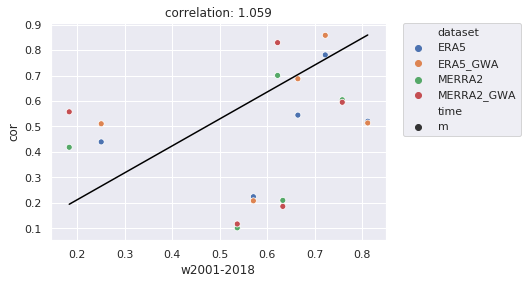

In [242]:
model = sm.OLS(res_cor.value[res_cor.param=='cor'], res_cor.loc[res_cor.param=='cor','w2001-2018']).fit()
xs = [res_cor.loc[(res_cor.param=='cor')&(res_cor.time=="m"),'w2001-2018'].min(),res_cor.loc[res_cor.param=='cor','w2001-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'w2001-2018':xs,'value':ys})

sns.lineplot(x="w2001-2018", y="value", data=line,color='black').set(ylabel='cor')
sns.scatterplot(x="w2001-2018", y="value", hue="dataset", style="time", data=res_cor[(res_cor.param=='cor')&(res_cor.time=="m")]).set(ylabel='cor')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

Text(0.5, 1.0, 'correlation: 0.215')

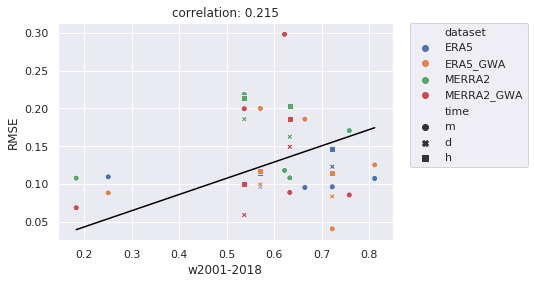

In [189]:
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','w2001-2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','w2001-2018'].min(),res_cor.loc[res_cor.param=='rmse','w2001-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'w2001-2018':xs,'value':ys})

sns.lineplot(x="w2001-2018", y="value", data=line,color='black').set(ylabel='RMSE')
sns.scatterplot(x="w2001-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse']).set(ylabel='RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

Text(0.5, 1.0, 'correlation: 0.217')

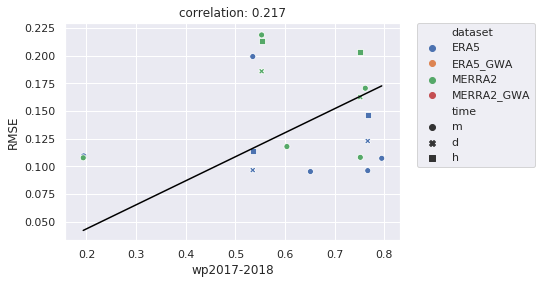

In [190]:
d = res_cor.loc[res_cor.param=='rmse',['value','wp2017-2018']].dropna()
model = sm.OLS(d.value,d['wp2017-2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2017-2018'].min(),res_cor.loc[res_cor.param=='rmse','wp2017-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017-2018':xs,'value':ys})

sns.lineplot(x="wp2017-2018", y="value", data=line,color='black').set(ylabel='RMSE')
sns.scatterplot(x="wp2017-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse']).set(ylabel='RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

Text(0.5, 1.0, 'correlation: 0.202')

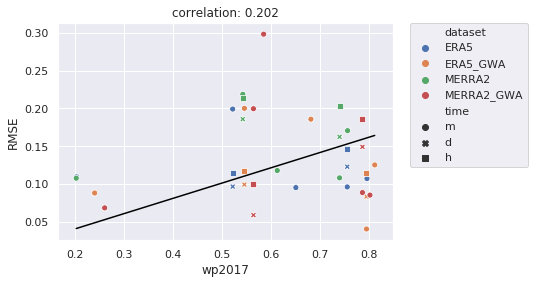

In [192]:
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','wp2017']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2017'].min(),res_cor.loc[res_cor.param=='rmse','wp2017'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017':xs,'value':ys})

sns.lineplot(x="wp2017", y="value", data=line,color='black').set(ylabel='RMSE')
sns.scatterplot(x="wp2017", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse']).set(ylabel='RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

Text(0.5, 1.0, 'correlation: 0.198')

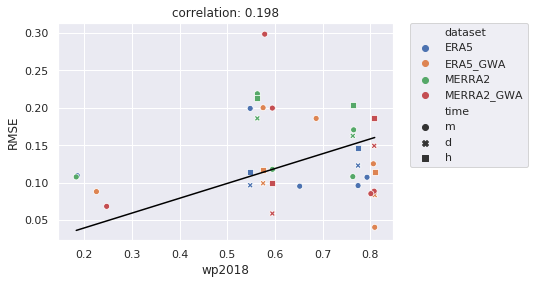

In [193]:
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','wp2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2018'].min(),res_cor.loc[res_cor.param=='rmse','wp2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2018':xs,'value':ys})

sns.lineplot(x="wp2018", y="value", data=line,color='black').set(ylabel='RMSE')
sns.scatterplot(x="wp2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse']).set(ylabel='RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('correlation: ' + str(round(model.params[0],3)))

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12, 10), dpi=300)
plt.subplots_adjust(hspace=0.35,wspace=0.3)

# plot 1
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','w2001-2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','w2001-2018'].min(),res_cor.loc[res_cor.param=='rmse','w2001-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'w2001-2018':xs,'value':ys})

sns.lineplot(x="w2001-2018", y="value", data=line,color='black', ax=axs[0,0]).set(ylabel='RMSE')
sns.scatterplot(x="w2001-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse'], ax=axs[0,0]).set(ylabel='RMSE')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=3)#, borderaxespad=0.,ax = axs[0,0])
axs[0,0].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 2
d = res_cor.loc[res_cor.param=='rmse',['value','wp2017-2018']].dropna()
model = sm.OLS(d.value,d['wp2017-2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2017-2018'].min(),res_cor.loc[res_cor.param=='rmse','wp2017-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017-2018':xs,'value':ys})

sns.lineplot(x="wp2017-2018", y="value", data=line,color='black', ax=axs[0,1]).set(ylabel='RMSE')
sns.scatterplot(x="wp2017-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse'], ax=axs[0,1]).set(ylabel='RMSE')
axs[0,1].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 3
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','wp2017']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2017'].min(),res_cor.loc[res_cor.param=='rmse','wp2017'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017':xs,'value':ys})

sns.lineplot(x="wp2017", y="value", data=line,color='black', ax=axs[1,0]).set(ylabel='RMSE')
sns.scatterplot(x="wp2017", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse'], ax=axs[1,0]).set(ylabel='RMSE')
axs[1,0].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 4
model = sm.OLS(res_cor.value[res_cor.param=='rmse'], res_cor.loc[res_cor.param=='rmse','wp2018']).fit()
xs = [res_cor.loc[res_cor.param=='rmse','wp2018'].min(),res_cor.loc[res_cor.param=='rmse','wp2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2018':xs,'value':ys})

sns.lineplot(x="wp2018", y="value", data=line,color='black', ax=axs[1,1]).set(ylabel='RMSE')
sns.scatterplot(x="wp2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='rmse'], ax=axs[1,1]).set(ylabel='RMSE')
axs[1,1].title.set_text('correlation: ' + str(round(model.params[0],3)))


axs[0,0].get_legend().set_visible(False)
axs[0,1].get_legend().set_visible(False)
axs[1,0].get_legend().set_visible(False)
axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0.)

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(12, 10), dpi=300)
plt.subplots_adjust(hspace=0.35,wspace=0.3)

# plot 1
model = sm.OLS(res_cor.value[res_cor.param=='cor'], res_cor.loc[res_cor.param=='cor','w2001-2018']).fit()
xs = [res_cor.loc[res_cor.param=='cor','w2001-2018'].min(),res_cor.loc[res_cor.param=='cor','w2001-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'w2001-2018':xs,'value':ys})

sns.lineplot(x="w2001-2018", y="value", data=line,color='black', ax=axs[0,0]).set(ylabel='cor')
sns.scatterplot(x="w2001-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='cor'], ax=axs[0,0]).set(ylabel='cor')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=3)#, borderaxespad=0.,ax = axs[0,0])
axs[0,0].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 2
d = res_cor.loc[res_cor.param=='cor',['value','wp2017-2018']].dropna()
model = sm.OLS(d.value,d['wp2017-2018']).fit()
xs = [res_cor.loc[res_cor.param=='cor','wp2017-2018'].min(),res_cor.loc[res_cor.param=='cor','wp2017-2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017-2018':xs,'value':ys})

sns.lineplot(x="wp2017-2018", y="value", data=line,color='black', ax=axs[0,1]).set(ylabel='cor')
sns.scatterplot(x="wp2017-2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='cor'], ax=axs[0,1]).set(ylabel='cor')
axs[0,1].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 3
model = sm.OLS(res_cor.value[res_cor.param=='cor'], res_cor.loc[res_cor.param=='cor','wp2017']).fit()
xs = [res_cor.loc[res_cor.param=='cor','wp2017'].min(),res_cor.loc[res_cor.param=='cor','wp2017'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2017':xs,'value':ys})

sns.lineplot(x="wp2017", y="value", data=line,color='black', ax=axs[1,0]).set(ylabel='cor')
sns.scatterplot(x="wp2017", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='cor'], ax=axs[1,0]).set(ylabel='cor')
axs[1,0].title.set_text('correlation: ' + str(round(model.params[0],3)))

# plot 4
model = sm.OLS(res_cor.value[res_cor.param=='cor'], res_cor.loc[res_cor.param=='cor','wp2018']).fit()
xs = [res_cor.loc[res_cor.param=='cor','wp2018'].min(),res_cor.loc[res_cor.param=='cor','wp2018'].max()]
ys = model.predict(xs)
line=pd.DataFrame({'wp2018':xs,'value':ys})

sns.lineplot(x="wp2018", y="value", data=line,color='black', ax=axs[1,1]).set(ylabel='cor')
sns.scatterplot(x="wp2018", y="value", hue="dataset", style="time", data=res_cor[res_cor.param=='cor'], ax=axs[1,1]).set(ylabel='cor')
axs[1,1].title.set_text('correlation: ' + str(round(model.params[0],3)))


axs[0,0].get_legend().set_visible(False)
axs[0,1].get_legend().set_visible(False)
axs[1,0].get_legend().set_visible(False)
axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0.)

# plot USA Enercon vs Ryberg

In [3]:
def get_cap_df(cap,comdate):
    com = pd.DataFrame({'capacity': cap}).groupby(comdate).sum()
    cap_cum = com.capacity.cumsum()
    dr = pd.date_range('1/1/2000','31/12/2018 23:00:00',freq = 'h')
    cap_ts = pd.Series(dr.map(cap_cum),index = dr)
    cap_ts[0] = cap_cum[cap_cum.index<=pd.Timestamp('2000-01-01')].max()
    return(cap_ts.fillna(method='ffill'))
    
    
### Prepare wind park data - Installed capacities
# get aggregated turbine data
turb_mer = pd.read_csv(usa_path + "/turbine_data_mer.csv",parse_dates = ['commissioning']).drop('Unnamed: 0',axis=1)
# get capacities time series for all regions
cap_usa = get_cap_df(turb_mer.capacity.values,
                     turb_mer.commissioning.values).tz_localize('UTC').tz_convert('US/Central')
# aggregate daily or monthly where needed
cap_usam = cap_usa.resample('M').sum()

In [4]:
### Analysis capacity factors

## USA monthly
# Load production data
# Source: https://www.eia.gov/electricity/data/browser/#/topic/0?agg=1,0,2&fuel=008&geo=vvvvvvvvvvvvo&sec=o3g&linechart=ELEC.GEN.WND-US-99.M~ELEC.GEN.WND-IA-99.M~ELEC.GEN.WND-TX-99.M&columnchart=ELEC.GEN.WND-US-99.M~ELEC.GEN.WND-IA-99.M~ELEC.GEN.WND-TX-99.M&map=ELEC.GEN.WND-US-99.M&freq=M&start=200101&end=201903&chartindexed=0&ctype=linechart&ltype=pin&rtype=s&pin=&rse=0&maptype=0
prod_USAm = pd.read_csv(usa_path+"/generation_data/USA_monthly/Net_generation_wind_all_sectors_monthly.csv",header=4)
# arrange data
# rename columns
prod_USAm.columns = ['time','wp_obs','Iowa','Texas']
# sort indices
prod_USAm = prod_USAm[~np.isnan(prod_USAm.wp_obs)].sort_index(axis=0 ,ascending=False)
# create datetime index
prod_USAm = prod_USAm.set_index(pd.to_datetime(prod_USAm.time.values)).drop(['time'],axis=1)
# cut after 2018
prod_USAm = prod_USAm[prod_USAm.index < np.datetime64("2019-01-01")].tz_localize('US/Central')

In [59]:
# Prepare simulated data
results_path_e82 = '/data/users/kgruber/results/USA/results_E82'
results_path_ryb = '/data/users/kgruber/results/USA/results_GWA2'
# load data
wpE = xr.open_dataset(results_path_e82+"/windpower_USA_ERA5.nc").to_dataframe()
wpE_GWA = xr.open_dataset(results_path_e82+"/windpower_USA_ERA5_GWA.nc").to_dataframe()
wpM = xr.open_dataset(results_path_e82+"/windpower_USA_MERRA2.nc").to_dataframe()
wpM_GWA = xr.open_dataset(results_path_e82+"/windpower_USA_MERRA2_GWA.nc").to_dataframe()

wpEryb = xr.open_dataset(results_path_ryb+"/windpower_USA_ERA5.nc").to_dataframe()
wpE_GWAryb = xr.open_dataset(results_path_ryb+"/windpower_USA_ERA5_GWA.nc").to_dataframe()
wpMryb = xr.open_dataset(results_path_ryb+"/windpower_USA_MERRA2.nc").to_dataframe()
wpM_GWAryb = xr.open_dataset(results_path_ryb+"/windpower_USA_MERRA2_GWA.nc").to_dataframe()

# merge data MERRA
wp_USAM = pd.concat([wpM,wpMryb],axis=1).tz_localize('UTC').tz_convert('US/Central')
wp_USAM.columns = ['E82','Ryberg']
# aggregate monthly
wp_USAMm = wp_USAM.resample('M').sum()
# combine data
comp_USAMm = pd.concat([wp_USAMm,prod_USAm.resample('M').sum().wp_obs*10**6],axis=1)
# calculate capacity factors
cf_USAMm = comp_USAMm.div(cap_usam,axis=0).dropna()

# merge data MERRA GWA
wp_USAMG = pd.concat([wpM_GWA,wpM_GWAryb],axis=1).tz_localize('UTC').tz_convert('US/Central')
wp_USAMG.columns = ['E82','Ryberg']
# aggregate monthly
wp_USAMGm = wp_USAMG.resample('M').sum()
# combine data
comp_USAMGm = pd.concat([wp_USAMGm,prod_USAm.resample('M').sum().wp_obs*10**6],axis=1)
# calculate capacity factors
cf_USAMGm = comp_USAMGm.div(cap_usam,axis=0).dropna()

# merge data ERA
wp_USAE = pd.concat([wpE,wpEryb],axis=1).tz_localize('UTC').tz_convert('US/Central')
wp_USAE.columns = ['E82','Ryberg']
# aggregate monthly
wp_USAEm = wp_USAE.resample('M').sum()
# combine data
comp_USAEm = pd.concat([wp_USAEm,prod_USAm.resample('M').sum().wp_obs*10**6],axis=1)
# calculate capacity factors
cf_USAEm = comp_USAEm.div(cap_usam,axis=0).dropna()

# merge data ERA GWA
wp_USAEG = pd.concat([wpE_GWA,wpE_GWAryb],axis=1).tz_localize('UTC').tz_convert('US/Central')
wp_USAEG.columns = ['E82','Ryberg']
# aggregate monthly
wp_USAEGm = wp_USAEG.resample('M').sum()
# combine data
comp_USAEGm = pd.concat([wp_USAEGm,prod_USAm.resample('M').sum().wp_obs*10**6],axis=1)
# calculate capacity factors
cf_USAEGm = comp_USAEGm.div(cap_usam,axis=0).dropna()

MERRA2

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


Text(0.5, 1.0, 'MERRA2')

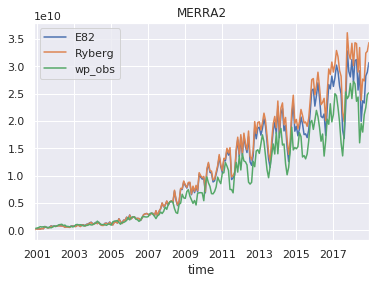

In [10]:
comp_USAMm.plot()
plt.title('MERRA2')

Text(0.5, 1.0, 'MERRA2')

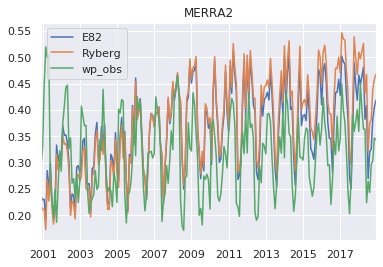

In [11]:
cf_USAMm.plot()
plt.title('MERRA2')

MERRA2 GWA

Text(0.5, 1.0, 'MERRA2 GWA Ryb 0.975 | E82 0.971')

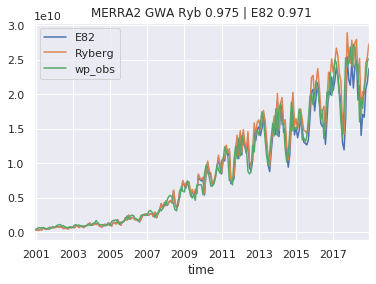

In [94]:
ds = comp_USAMGm.dropna()
ds.plot()
plt.title('MERRA2 GWA Ryb '+str(round(np.corrcoef(ds.Ryberg,ds.wp_obs)[0,1],3)) +
          ' | E82 ' + str(round(np.corrcoef(ds.E82,ds.wp_obs)[0,1],3)))

In [89]:
round(np.corrcoef(cf_USAMGm.Ryberg,cf_USAMGm.wp_obs)[0,1],3)

0.558

Text(0.5, 1.0, 'MERRA2 GWA Ryb 0.558 | E82 0.604')

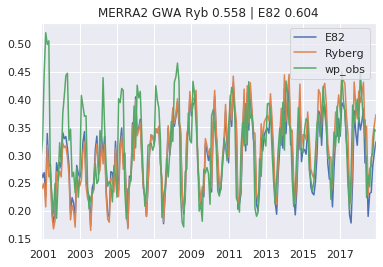

In [92]:
ds = cf_USAMGm
ds.plot()
plt.title('MERRA2 GWA Ryb '+str(round(np.corrcoef(ds.Ryberg,ds.wp_obs)[0,1],3)) +
          ' | E82 ' + str(round(np.corrcoef(ds.E82,ds.wp_obs)[0,1],3)))

ERA5

Text(0.5, 1.0, 'ERA5 Ryb 0.968 | E82 0.964')

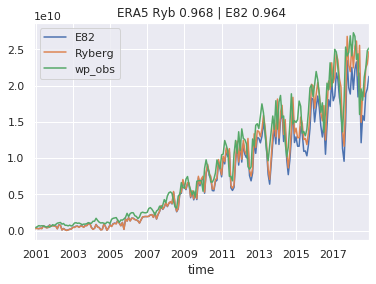

In [97]:
ds = comp_USAEm.dropna()
ds.plot()
plt.title('ERA5 Ryb '+str(round(np.corrcoef(ds.Ryberg,ds.wp_obs)[0,1],3)) +
          ' | E82 ' + str(round(np.corrcoef(ds.E82,ds.wp_obs)[0,1],3)))

In [68]:
np.corrcoef(comp_USAEm.dropna().Ryberg,comp_USAEm.dropna().wp_obs)[0,1]

0.9675373934203124

Text(0.5, 1.0, 'ERA5 Ryb 0.439 | E82 0.472')

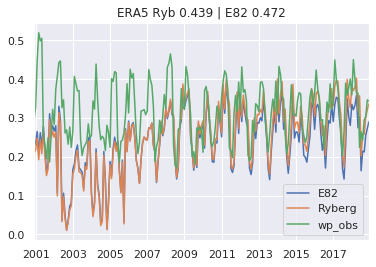

In [98]:
ds = cf_USAEm.dropna()
ds.plot()
plt.title('ERA5 Ryb '+str(round(np.corrcoef(ds.Ryberg,ds.wp_obs)[0,1],3)) +
          ' | E82 ' + str(round(np.corrcoef(ds.E82,ds.wp_obs)[0,1],3)))

In [69]:
np.corrcoef(cf_USAEm.Ryberg,cf_USAEm.wp_obs)[0,1]

0.43932344735851714

ERA5 GWA

Text(0.5, 1.0, 'ERA5 GWA Ryb 0.969 | E82 0.965')

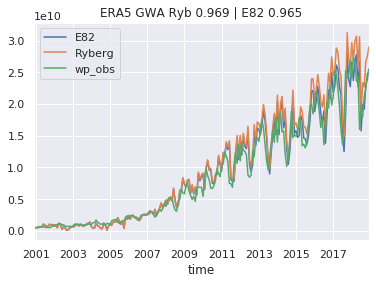

In [95]:
ds = comp_USAEGm.dropna()
ds.plot()
plt.title('ERA5 GWA Ryb '+str(round(np.corrcoef(ds.Ryberg,ds.wp_obs)[0,1],3)) +
          ' | E82 ' + str(round(np.corrcoef(ds.E82,ds.wp_obs)[0,1],3)))

In [66]:
np.corrcoef(comp_USAEGm.dropna().E82,comp_USAEGm.dropna().wp_obs)[0,1]

0.9654277968382581

Text(0.5, 1.0, 'ERA5 GWA Ryb 0.511 | E82 0.532')

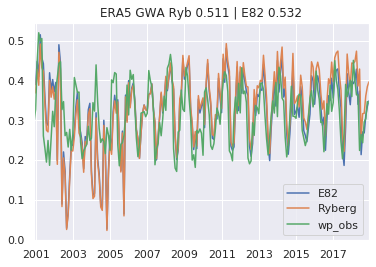

In [96]:
ds = cf_USAEGm
ds.plot()
plt.title('ERA5 GWA Ryb '+str(round(np.corrcoef(ds.Ryberg,ds.wp_obs)[0,1],3)) +
          ' | E82 ' + str(round(np.corrcoef(ds.E82,ds.wp_obs)[0,1],3)))

In [74]:
cf_USAEGm.index

DatetimeIndex(['2000-12-31 00:00:00-06:00', '2001-01-31 00:00:00-06:00',
               '2001-02-28 00:00:00-06:00', '2001-03-31 00:00:00-06:00',
               '2001-04-30 00:00:00-05:00', '2001-05-31 00:00:00-05:00',
               '2001-06-30 00:00:00-05:00', '2001-07-31 00:00:00-05:00',
               '2001-08-31 00:00:00-05:00', '2001-09-30 00:00:00-05:00',
               ...
               '2018-03-31 00:00:00-05:00', '2018-04-30 00:00:00-05:00',
               '2018-05-31 00:00:00-05:00', '2018-06-30 00:00:00-05:00',
               '2018-07-31 00:00:00-05:00', '2018-08-31 00:00:00-05:00',
               '2018-09-30 00:00:00-05:00', '2018-10-31 00:00:00-05:00',
               '2018-11-30 00:00:00-06:00', '2018-12-31 00:00:00-06:00'],
              dtype='datetime64[ns, US/Central]', length=217, freq='M')

In [79]:
cf_USAEGm2008 = cf_USAEGm[cf_USAEGm.index>pd.to_datetime('2008-01-01').tz_localize('US/Central')]
np.corrcoef(cf_USAEGm2008.Ryberg,cf_USAEGm2008.wp_obs)[0,1]

0.6472215848127697

In [81]:
cf_USAEGm2008 = cf_USAEGm[cf_USAEGm.index>pd.to_datetime('2008-01-01').tz_localize('US/Central')]
np.corrcoef(cf_USAEGm2008.E82,cf_USAEGm2008.wp_obs)[0,1]

0.635421747410096

In [82]:
cf_USAEGm2000 = cf_USAEGm[cf_USAEGm.index<pd.to_datetime('2008-01-01').tz_localize('US/Central')]
np.corrcoef(cf_USAEGm2000.Ryberg,cf_USAEGm2000.wp_obs)[0,1]

0.4591022729244155

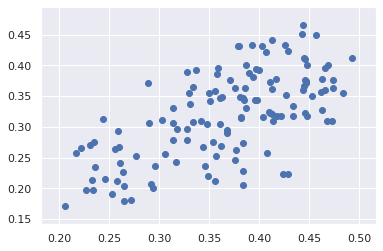

In [84]:
plt.scatter(cf_USAEGm2008.Ryberg,cf_USAEGm2008.wp_obs)

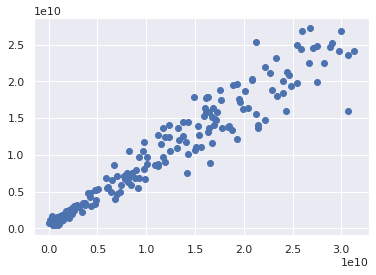

In [85]:
plt.scatter(comp_USAEGm.Ryberg[1:],comp_USAEGm.wp_obs[1:])

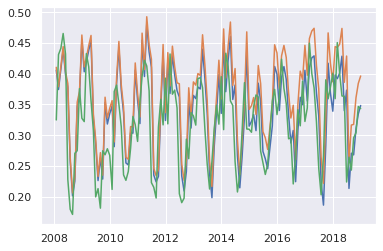

In [80]:
plt.plot(cf_USAEGm2008)

In [70]:
np.corrcoef(cf_USAEGm.Ryberg,cf_USAEGm.wp_obs)[0,1]

0.5106166524798769

### plot specific power over time

In [32]:
t_mer = pd.read_csv(usa_path + '/turbine_data_mer.csv',index_col = 0,parse_dates=['commissioning'])
t_mer_gwa = pd.read_csv(usa_path + '/turbine_data_mer_gwa.csv',index_col = 0,parse_dates=['commissioning'])
t_era = pd.read_csv(usa_path + '/turbine_data_era.csv',index_col = 0,parse_dates=['commissioning'])
t_era_gwa = pd.read_csv(usa_path + '/turbine_data_era_gwa.csv',index_col = 0,parse_dates=['commissioning'])

In [51]:
t_mer.sp[t_mer.sp>2000] = t_mer.sp.mean()

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
t_mer.sp.mean()

310.5105167094481

In [54]:
t_mer.sp.median()

314.2069728760344

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe866a8ad68>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe866aaa7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe866a8abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe866aaaeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe866aaafd0>],
 'means': []}

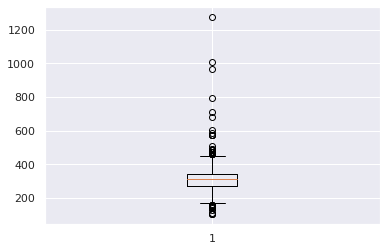

In [55]:
plt.boxplot(t_mer.sp)

Text(0, 0.5, 'specific power [W/m²]')

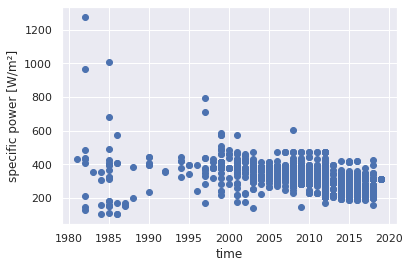

In [57]:
plt.scatter(t_mer.commissioning.dt.year,t_mer.sp)
plt.xlabel('time')
plt.ylabel('specific power [W/m²]')

Text(0, 0.5, 'hubheight [m]')

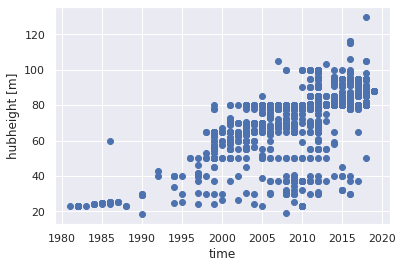

In [58]:
plt.scatter(t_mer.commissioning.dt.year,t_mer.height)
plt.xlabel('time')
plt.ylabel('hubheight [m]')

In [12]:
import glob
ofile = results_path_e82 + "/windpower_states_MERRA2.nc"
if ofile not in glob.glob(results_path_e82 + '/*'):
    turbine_data_mer = pd.read_csv(usa_path+"/turbine_data_mer.csv")
    wp_loc = xr.open_dataset(results_path_e82+"/windpower_stat_MERRA2.nc")
    wp = wp_loc.groupby(xr.DataArray(turbine_data_mer.state,dims='location')).sum('location')
    wp.to_netcdf(ofile)
    del(wp,wp_loc,turbine_data_mer)

In [14]:
ofile = results_path_e82+"/windpower_USA_MERRA2.nc"
if ofile not in glob.glob(results_path_e82 + "/*"):
    wp_state = xr.open_dataset(results_path_e82+"/windpower_states_MERRA2.nc")
    wpUSA = wp_state.sum('state')
    wpUSA.to_netcdf(ofile)